In [1]:
:ext DataKinds FlexibleContexts TemplateHaskell TypeApplications

In [2]:
import DataGlue.Frames
import Frames.CSV

-- Since the used dataset as no header, let's define the column names.
datasource = "../datasets/iris.csv"
tableTypes' (rowGen datasource)
            { rowTypeName = "IrisRow"
            , columnNames = [ "Petal Length", "Petal Width", "Sepal Length" , "Sepal Width", "Iris Class" ]}

loadRows :: IO (Frame IrisRow)
loadRows = inCoreAoS (readTable datasource)

iris <- loadRows

In [3]:
-- Show dataframe structure.
describe iris

149x5 dataframe.
  column "Petal Length": Double
  column "Petal Width": Double
  column "Sepal Length": Double
  column "Sepal Width": Double
  column "Iris Class": Text

In [4]:
-- Show dataframe content.
iris

Petal Length,Petal Width,Sepal Length,Sepal Width,Iris Class
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""
5.4,3.9,1.7,0.4,"""Iris-setosa"""
4.6,3.4,1.4,0.3,"""Iris-setosa"""
5.0,3.4,1.5,0.2,"""Iris-setosa"""
4.4,2.9,1.4,0.2,"""Iris-setosa"""
4.9,3.1,1.5,0.1,"""Iris-setosa"""
5.4,3.7,1.5,0.2,"""Iris-setosa"""


In [5]:
(train, test) = splitTrainTestFrame @'[IrisClass] 0 iris 0.8
length train
length test

119

30

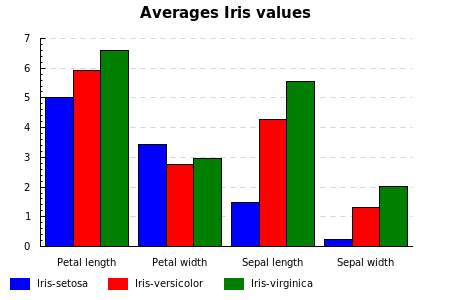

In [6]:
import Control.Lens
import DataGlue.Chart
import qualified DataGlue.Frames.GroupBy as G
import Data.Text (unpack)

avgs = G.groupByOp irisClass iris G.mean [petalLength, petalWidth, sepalLength, sepalWidth]

alabels = ["Petal length", "Petal width", "Sepal length", "Sepal width"]

bars2 = plot_bars_titles .~ (unpack <$> uniques irisClass iris)
    $ plot_bars_values .~ addIndexes avgs
    $ def

mkstyle c = (solidFillStyle c, Just (solidLine 1.0 $ opaque black))

toRenderable
    $ layout_title .~ "Averages Iris values"
    $ layout_x_axis . laxis_generate .~ autoIndexAxis alabels
    $ layout_plots .~ [ plotBars bars2 ]
    $ def